In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# File to Load 
layoffs_file = Path("Resources/layoffs.csv")

# Read Layoffs file and store into Pandas DataFrames
layoffs_data = pd.read_csv(layoffs_file)
layoffs_data_df = layoffs_data

# Display the data table for preview
display(layoffs_data_df)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,NaN,2024-05-30,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05-29,Series B,United States,56.0
2,Fisker,Los Angeles,Transportation,NaN,NaN,2024-05-29,Post-IPO,United States,1700.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05-24,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05-23,Series G,United States,390.0
...,...,...,...,...,...,...,...,...,...
3620,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


In [2]:
# General information about the Dataframe
layoffs_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3625 non-null   object 
 1   location             3624 non-null   object 
 2   industry             3624 non-null   object 
 3   total_laid_off       2377 non-null   float64
 4   percentage_laid_off  2331 non-null   float64
 5   date                 3625 non-null   object 
 6   stage                3618 non-null   object 
 7   country              3625 non-null   object 
 8   funds_raised         3236 non-null   float64
dtypes: float64(3), object(6)
memory usage: 255.0+ KB


In [3]:
# Checking if there is any empty value
layoffs_data_df.isna().sum()

company                   0
location                  1
industry                  1
total_laid_off         1248
percentage_laid_off    1294
date                      0
stage                     7
country                   0
funds_raised            389
dtype: int64

In [4]:
# ------------- Clean data --------------

# Fixing missing values
layoffs_data_df["total_laid_off"] = layoffs_data_df["total_laid_off"].fillna(0)
layoffs_data_df["percentage_laid_off"] = layoffs_data_df["percentage_laid_off"].fillna(0)
layoffs_data_df["funds_raised"] = layoffs_data_df["funds_raised"].fillna(0)

# Converting date to mm/yyyy
layoffs_data_df['date'] = pd.to_datetime(layoffs_data_df['date']).dt.strftime('%Y-%m')

# Selecting only the data where the total number of layoffs is different from zero 0
layoffs_data_df = layoffs_data_df[layoffs_data_df["total_laid_off"] != 0]
 

display(layoffs_data_df)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,0.00,2024-05,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05,Series B,United States,56.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05,Series G,United States,390.0
5,Guild,Denver,Education,300.0,0.25,2024-05,Series F,United States,643.0
...,...,...,...,...,...,...,...,...,...
3619,Help.com,Austin,Support,16.0,1.00,2020-03,Seed,United States,6.0
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03,Unknown,United States,45.0
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03,Seed,United States,1.0
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03,Series C,United States,90.0


In [5]:
#  Select only the United States
usa_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] == "United States")]

display(usa_layoffs_df)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,0.00,2024-05,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05,Series B,United States,56.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05,Series G,United States,390.0
5,Guild,Denver,Education,300.0,0.25,2024-05,Series F,United States,643.0
...,...,...,...,...,...,...,...,...,...
3619,Help.com,Austin,Support,16.0,1.00,2020-03,Seed,United States,6.0
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03,Unknown,United States,45.0
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03,Seed,United States,1.0
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03,Series C,United States,90.0


In [6]:
# Total of layoffs per industry in USA

usa_lay_industry = usa_layoffs_df.groupby('industry')["total_laid_off"].sum()

# Converting data to int
usa_lay_industry = usa_lay_industry.astype(int)

# Display the data table
display(usa_lay_industry)

print(f'Total of industry: {len(usa_lay_industry)}')



industry
AI                  242
Aerospace           737
Construction       3330
Consumer          57220
Crypto             6628
Data               8177
Education          2692
Energy             1647
Finance           24641
Fitness            7637
Food              14461
HR                 6913
Hardware          36210
Healthcare        22237
Infrastructure    14711
Legal               906
Logistics          3690
Manufacturing      1512
Marketing          6734
Media              4627
Other             32819
Product            1792
Real Estate       16141
Recruiting         4575
Retail            49887
Sales             14538
Security           8402
Support            5443
Transportation    42675
Travel            11691
Name: total_laid_off, dtype: int32

Total of industry: 30


In [7]:
# Sumary of layoffs per industry in USA

usa_lay_industry = usa_layoffs_df.groupby('industry')

#display(total_industry)

usa_lay_ind_sum = usa_lay_industry["total_laid_off"].sum().astype(int)
usa_lay_ind_avg = usa_lay_industry["total_laid_off"].mean().round(2)
usa_lay_ind_median = usa_lay_industry["total_laid_off"].median()

usa_lay_ind_summary = pd.DataFrame({'Total Layoffs': usa_lay_ind_sum,
                        'Average Layoffs': usa_lay_ind_avg,
                        'Median Layoffs': usa_lay_ind_median})


usa_lay_ind_summary


,Total Layoffs,Average Layoffs,Median Layoffs
industry,,,
AI,242,60.50,40.0
Aerospace,737,81.89,75.0
Construction,3330,555.00,210.0
Consumer,57220,615.27,95.0
Crypto,6628,157.81,60.0
Data,8177,138.59,80.0
Education,2692,74.78,46.5
Energy,1647,183.00,154.0
Finance,24641,147.55,75.0


In [8]:
# Sumary of layoff per month/ year in the USA
usa_lay_period = usa_layoffs_df.groupby(['date', 'industry'])

usa_lay_date_sum = usa_lay_period["total_laid_off"].sum().astype(int)
usa_lay_date_avg = usa_lay_period["total_laid_off"].mean().round(2)
usa_lay_date_median = usa_lay_period["total_laid_off"].median()


usa_lay_date_sumary = pd.DataFrame({'Total Layoffs': usa_lay_date_sum,
                                    'Average Layoffs': usa_lay_date_avg,
                                    'Median Layoffs': usa_lay_date_median,})

usa_lay_date_sumary


Total Layoffs  Average Layoffs  Median Layoffs
date    industry                                                      
2020-03 Construction               60            60.00            60.0
        Consumer                  590           118.00           130.0
        Data                      230            76.67            20.0
        Education                  50            50.00            50.0
        Energy                    120           120.00           120.0
...                               ...              ...             ...
2024-05 Product                    30            30.00            30.0
        Sales                      15            15.00            15.0
        Support                   116           116.00           116.0
        Transportation           1360           272.00           150.0
        Travel                    873           436.50           436.5

[581 rows x 3 columns]

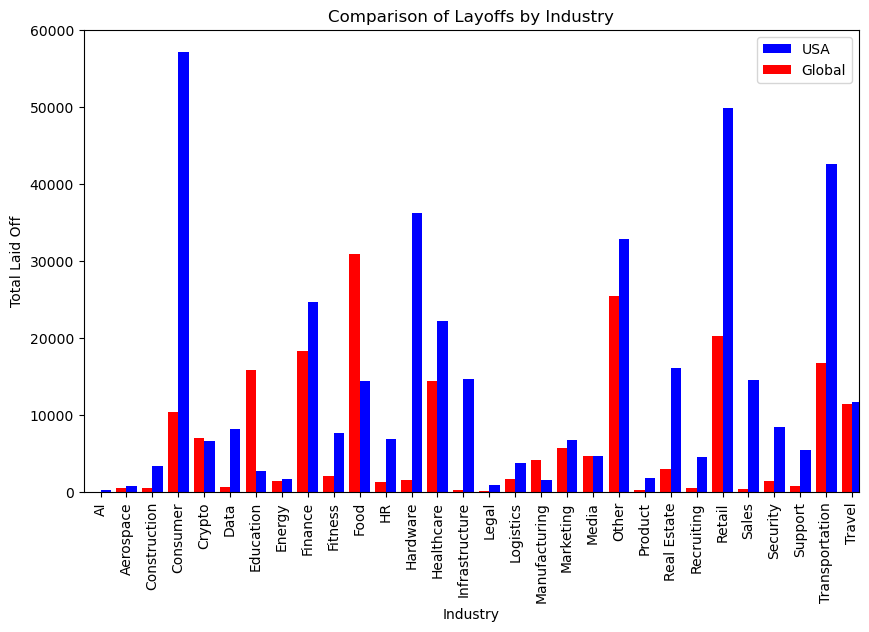

In [9]:
# Supondo que usa_layoffs_df e all_layoffs_df são seus dataframes com os dados dos Estados Unidos e do resto do mundo, respectivamente

# Criando os gráficos de barras separadamente

usa_ind_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] == "United States")]
global_ind_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] != "United States")]

fig, ax = plt.subplots(figsize=(10, 6))

usa_ind_layoffs_df.groupby('industry')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='blue', width=0.4, position=0, label='USA')
global_ind_layoffs_df.groupby('industry')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='red', width=0.4, position=1, label='Global')

# Adicionando rótulos e título
plt.xlabel('Industry')
plt.ylabel('Total Laid Off')
plt.title('Comparison of Layoffs by Industry')
plt.legend()

# Exibindo o gráfico
plt.show()

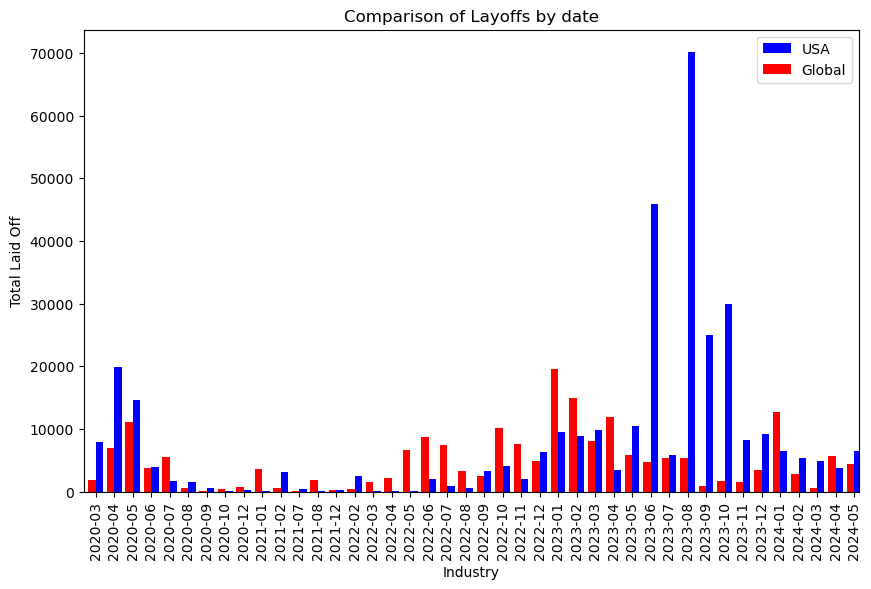

In [10]:
usa_ind_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] == "United States")]
global_ind_layoffs_df = layoffs_data_df[(layoffs_data_df["country"] != "United States")]

fig, ax = plt.subplots(figsize=(10, 6))

usa_ind_layoffs_df.groupby('date')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='blue', width=0.4, position=0, label='USA')
global_ind_layoffs_df.groupby('date')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='red', width=0.4, position=1, label='Global')

# Adicionando rótulos e título
plt.xlabel('Industry')
plt.ylabel('Total Laid Off')
plt.title('Comparison of Layoffs by date')
plt.legend()

# Exibindo o gráfico
plt.show()

In [11]:
# quarter

quarter_df = layoffs_data_df

#Formating date to datetime 
quarter_df['date'] = pd.to_datetime(quarter_df['date'], format='%Y-%m')

# Verificar se a conversão foi bem-sucedida
print(layoffs_data_df['date'].dtype)

#Creatindg 2 new columns:
quarter_df['quarter'] = quarter_df['date'].dt.to_period('Q')
quarter_df['year'] = quarter_df['date'].dt.strftime('%Y')

display(quarter_df)

datetime64[ns]


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,quarter,year
0,FlightStats,Portland,Travel,73.0,0.00,2024-05-01,Acquired,United States,3.0,2024Q2,2024
1,Walnut,New York City,Sales,15.0,0.20,2024-05-01,Series B,United States,56.0,2024Q2,2024
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05-01,Post-IPO,United States,8300.0,2024Q2,2024
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05-01,Series G,United States,390.0,2024Q2,2024
5,Guild,Denver,Education,300.0,0.25,2024-05-01,Series F,United States,643.0,2024Q2,2024
...,...,...,...,...,...,...,...,...,...,...,...
3619,Help.com,Austin,Support,16.0,1.00,2020-03-01,Seed,United States,6.0,2020Q1,2020
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-01,Unknown,United States,45.0,2020Q1,2020
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-01,Seed,United States,1.0,2020Q1,2020
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-01,Series C,United States,90.0,2020Q1,2020


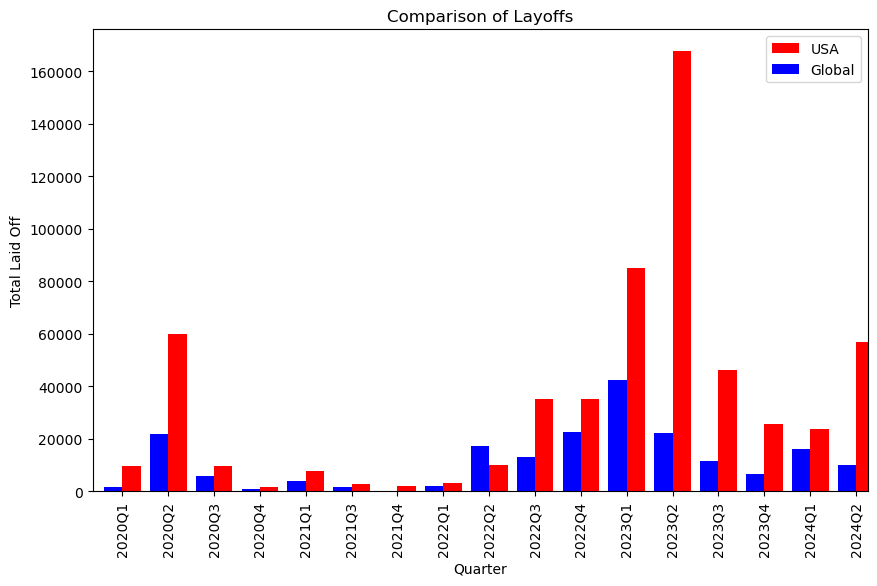

In [12]:
usa_quarter_df = layoffs_data_df[(layoffs_data_df["country"] == "United States")]
global_quarter_df = layoffs_data_df[(layoffs_data_df["country"] != "United States")]

fig, ax = plt.subplots(figsize=(10, 6))

quarter_df.groupby('quarter')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='red', width=0.4, position=0, label='USA')
global_quarter_df.groupby('quarter')['total_laid_off'].sum().plot(kind='bar', ax=ax, color='blue', width=0.4, position=1, label='Global')

# Adicionando rótulos e título
plt.xlabel('Quarter')
plt.ylabel('Total Laid Off')
plt.title('Comparison of Layoffs')
plt.legend()

# Exibindo o gráfico
plt.show()

In [13]:
# New dataframe for companies with the highest layoffs in 2020.
lay_2020 = quarter_df['year'].values == '2020'
lay_2020_df = quarter_df[lay_2020]
lay_2020_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,quarter,year
2990,Pulse Secure,SF Bay Area,Security,78.0,0.00,2020-12-01,Acquired,United States,0.0,2020Q4,2020
2991,Breather,Montreal,Real Estate,120.0,0.80,2020-12-01,Series D,Canada,131.0,2020Q4,2020
2992,Actifio,Boston,Data,54.0,0.00,2020-12-01,Acquired,United States,352.0,2020Q4,2020
2993,OYO,Gurugram,Travel,600.0,0.00,2020-12-01,Series F,India,3200.0,2020Q4,2020
2995,Aya,Toronto,Finance,5.0,0.25,2020-11-01,Seed,United States,3.0,2020Q4,2020


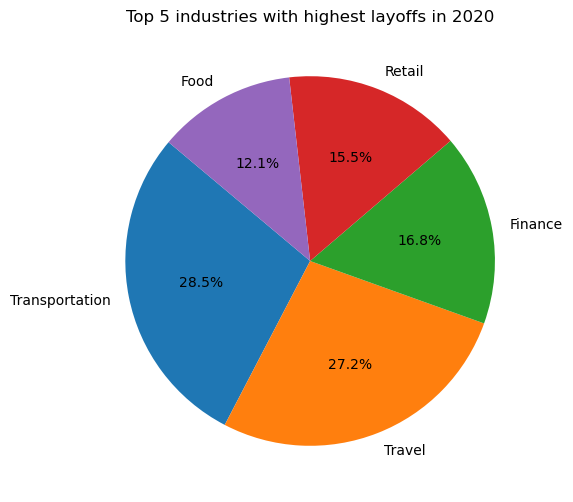

In [14]:
#Layoff by Industry in 2020

# Calcular o total de layoffs por setor (industry) e selecionar os 5 principais
top_industries = lay_2020_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(5)

# Plotar o gráfico de pizza
plt.figure(figsize=(12, 6))
plt.pie(top_industries, labels=top_industries.index, autopct='%1.1f%%', startangle=140)

# Adicionar título
plt.title('Top 5 industries with highest layoffs in 2020')

# Exibir o gráfico
plt.show()

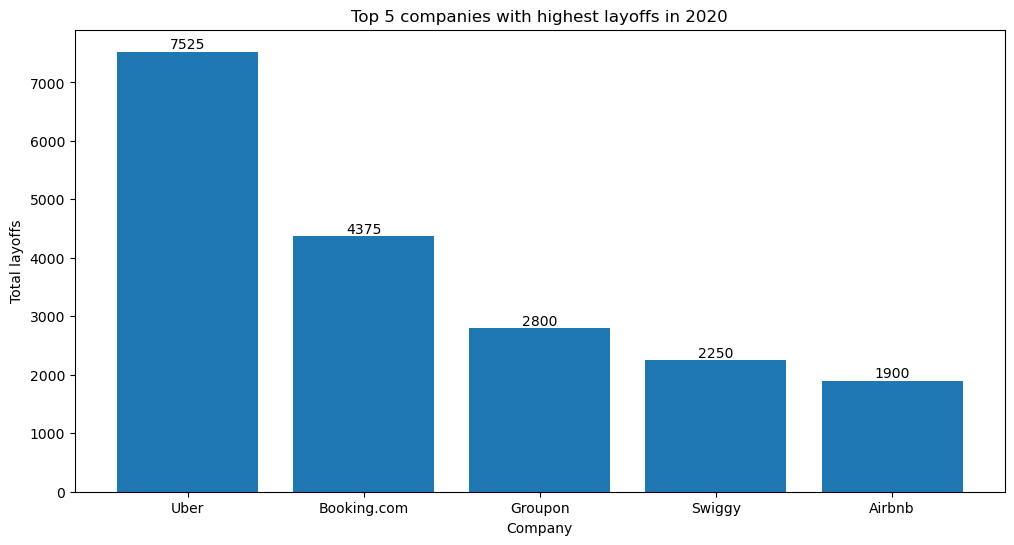

In [15]:
#Layoff by Company in 2020

# Calcular o total de layoffs por empresa e selecionar as 5 principais
top_companies = lay_2020_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()

# Plotar o gráfico de barras com rótulos sobre as barras
plt.figure(figsize=(12, 6))
bars = plt.bar(top_companies.index, top_companies.values)

# Adicionar os valores sobre as barras usando plt.bar_label()
plt.bar_label(bars, label_type='edge', fmt='%.0f')

# Adicionar título e rótulos
plt.title('Top 5 companies with highest layoffs in 2020')
plt.ylabel('Total layoffs')
plt.xlabel('Company')

# Exibir o gráfico
plt.show()

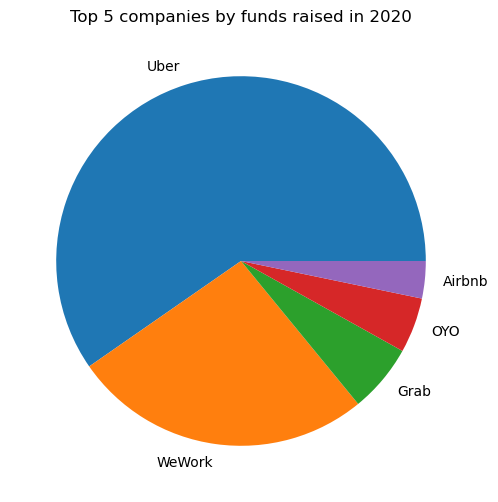

In [16]:
# #Company by fund raised in 2020
top_fund_raised = lay_2020_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head(5)

# Plotar o gráfico de pizza
plt.figure(figsize=(12, 6))
plt.pie(top_fund_raised, labels=top_fund_raised.index)

# Adicionar título
plt.title('Top 5 companies by funds raised in 2020')

# Exibir o gráfico
plt.show()


In [17]:
# New dataframes 

# 2021
lay_2021 = quarter_df['year'].values == '2021'
lay_2021_df = quarter_df[lay_2021]

# 2022
lay_2022 = quarter_df['year'].values == '2022'
lay_2022_df = quarter_df[lay_2022]

# 2023
lay_2023 = quarter_df['year'].values == '2022'
lay_2023_df = quarter_df[lay_2022]

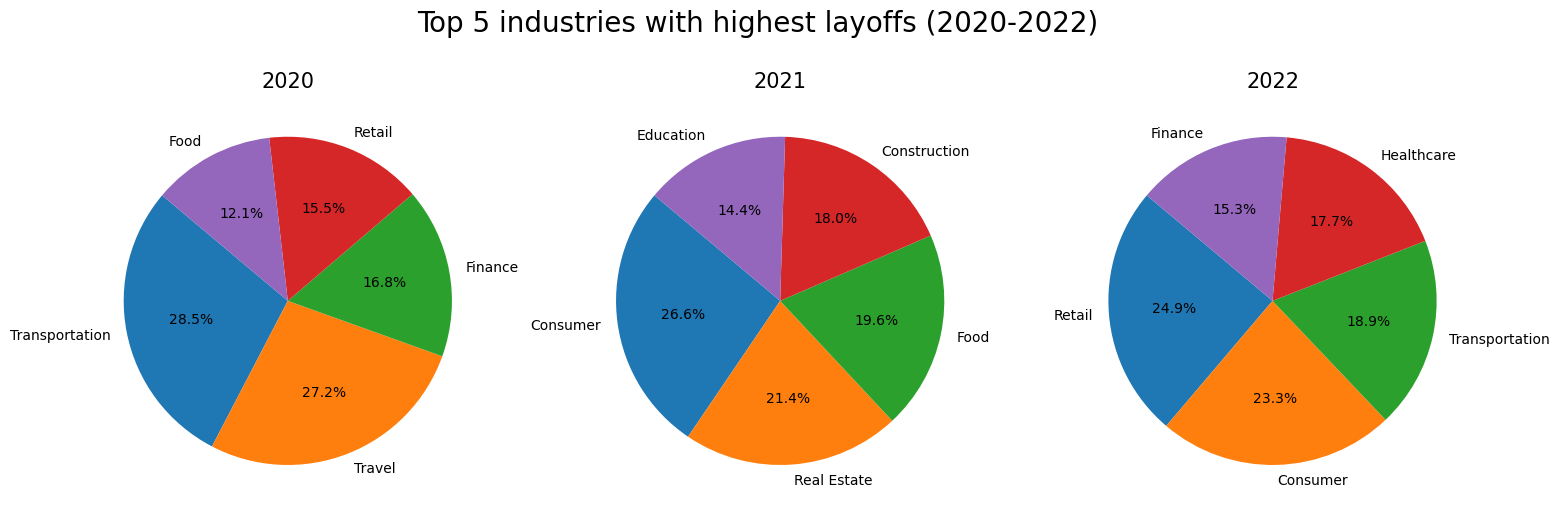

In [18]:
# Calcular o total de layoffs por setor (industry) e selecionar os 5 principais para cada ano
top_industries_2020 = lay_2020_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()
top_industries_2021 = lay_2021_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()
top_industries_2022 = lay_2022_df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head()

# Configurar subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de pizza para 2020
axs[0].pie(top_industries_2020, labels=top_industries_2020.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('2020', fontsize=15)

# Gráfico de pizza para 2021
axs[1].pie(top_industries_2021, labels=top_industries_2021.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('2021', fontsize=15)

# Gráfico de pizza para 2022
axs[2].pie(top_industries_2022, labels=top_industries_2022.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('2022', fontsize=15)

# Título geral para os subplots
fig.suptitle('Top 5 industries with highest layoffs (2020-2022)', fontsize=20)

# Exibir os gráficos
plt.show()

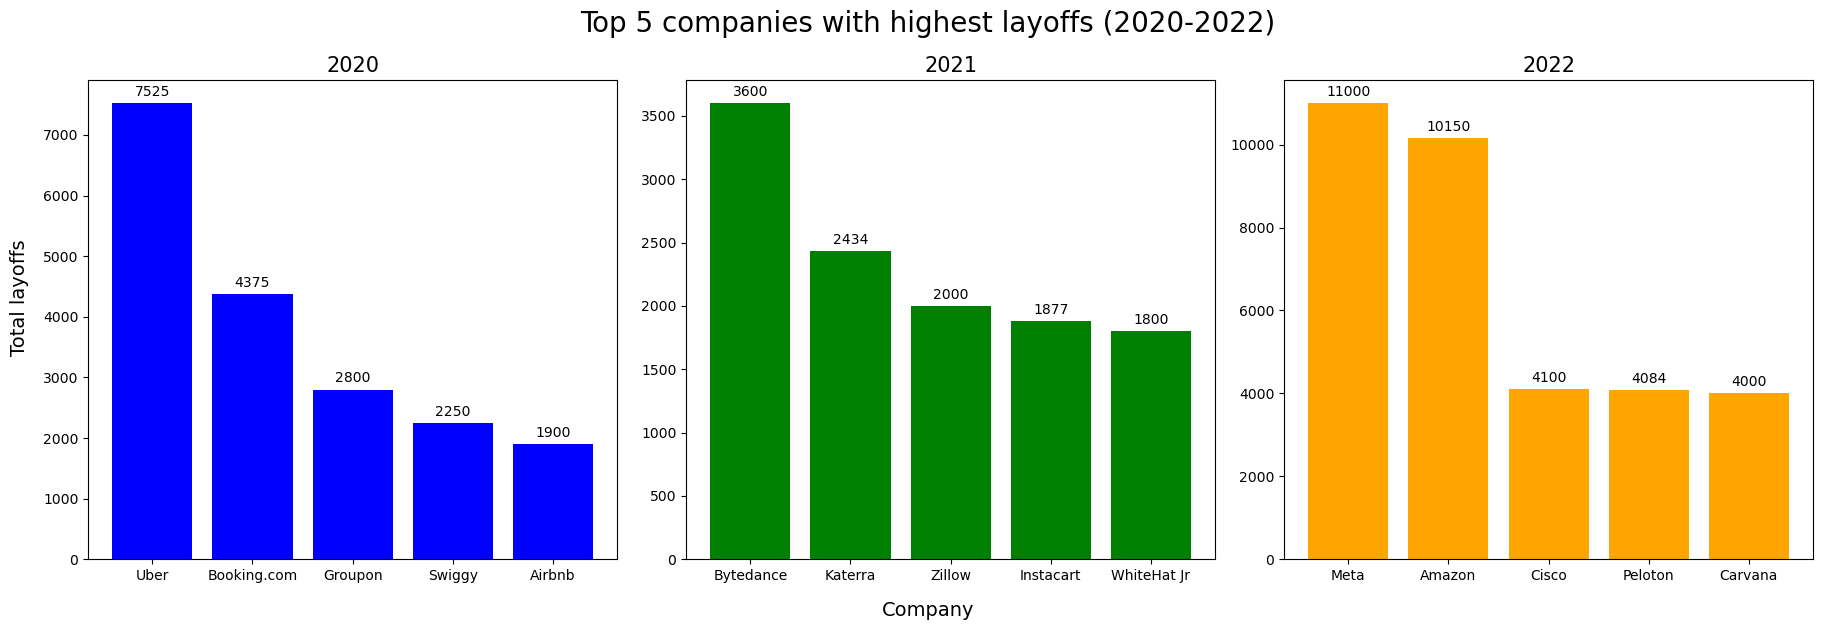

In [19]:

# Calcular o total de layoffs por empresa (company) e selecionar as 5 principais para cada ano
top_companies_2020 = lay_2020_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()
top_companies_2021 = lay_2021_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()
top_companies_2022 = lay_2022_df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head()

# Configurar subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Função para adicionar bar_labels
def add_bar_labels(ax, data, color):
    rects = ax.bar(data.index, data.values, color=color)
    ax.bar_label(rects, padding=3)  # Adiciona os rótulos das barras com um padding de 3 pontos

# Gráfico de barras para 2020 (azul)
add_bar_labels(axs[0], top_companies_2020, color='blue')
axs[0].set_title('2020', fontsize=15)

# Gráfico de barras para 2021 (verde)
add_bar_labels(axs[1], top_companies_2021, color='green')
axs[1].set_title('2021', fontsize=15)

# Gráfico de barras para 2022 (laranja)
add_bar_labels(axs[2], top_companies_2022, color='orange')
axs[2].set_title('2022', fontsize=15)

# Título geral para os subplots
fig.suptitle('Top 5 companies with highest layoffs (2020-2022)', fontsize=20)

# Rótulo do eixo y na parte inferior
fig.text(0.5, -0.03, 'Company', ha='center', fontsize=14)

# Rótulo do eixo x à esquerda
fig.text(-0.01, 0.5, 'Total layoffs', va='center', rotation='vertical', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

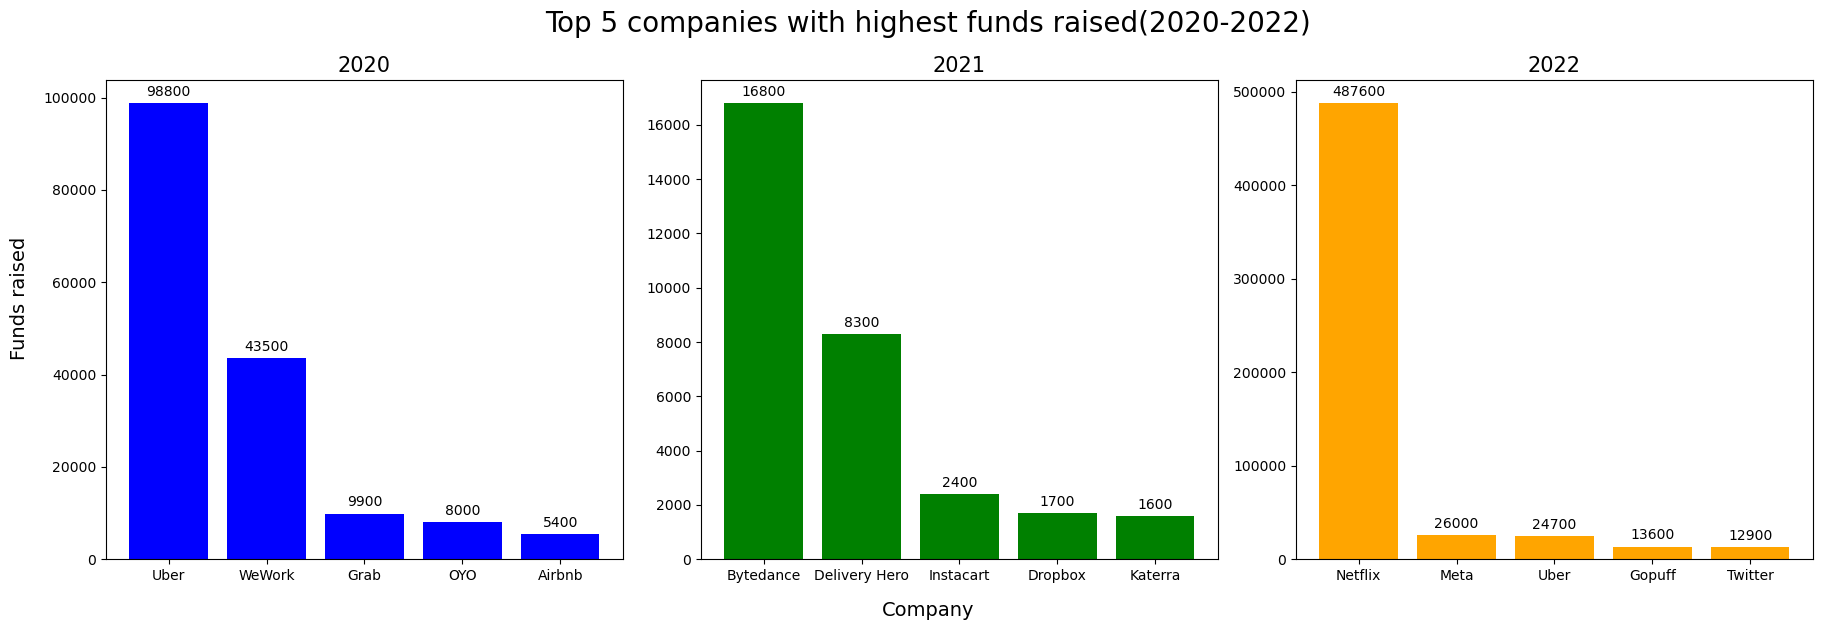

In [20]:
# Calcular o total de layoffs por empresa (company) e selecionar as 5 principais para cada ano
top_fund_raised_2020 = lay_2020_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head()
top_fund_raised_2021 = lay_2021_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head()
top_fund_raised_2022 = lay_2022_df.groupby('company')['funds_raised'].sum().sort_values(ascending=False).head()

# Configurar subplots lado a lado
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
# Função para adicionar bar_labels
def add_bar_labels(ax, data, color):
    rects = ax.bar(data.index, data.values, color=color)
    ax.bar_label(rects, padding=3)  # Adiciona os rótulos das barras com um padding de 3 pontos

# Gráfico de barras para 2020
add_bar_labels(axs[0], top_fund_raised_2020, color='blue')
axs[0].set_title('2020', fontsize=15)

# Gráfico de barras para 2021
add_bar_labels(axs[1], top_fund_raised_2021, color='green')
axs[1].set_title('2021', fontsize=15)

# Gráfico de barras para 2022
add_bar_labels(axs[2], top_fund_raised_2022, color='orange')
axs[2].set_title('2022', fontsize=15)

# Título geral para os subplots
fig.suptitle('Top 5 companies with highest funds raised(2020-2022)', fontsize=20)

# Rótulo do eixo y na parte inferior
fig.text(0.5, -0.03, 'Company', ha='center', fontsize=14)

# Rótulo do eixo x à esquerda
fig.text(-0.01, 0.5, 'Funds raised', va='center', rotation='vertical', fontsize=14)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [21]:
usa_layoffs_df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,FlightStats,Portland,Travel,73.0,0.00,2024-05,Acquired,United States,3.0
1,Walnut,New York City,Sales,15.0,0.20,2024-05,Series B,United States,56.0
3,Lucid Motors,SF Bay Area,Transportation,400.0,0.06,2024-05,Post-IPO,United States,8300.0
4,Foursquare,New York City,Marketing,105.0,0.25,2024-05,Series G,United States,390.0
5,Guild,Denver,Education,300.0,0.25,2024-05,Series F,United States,643.0
...,...,...,...,...,...,...,...,...,...
3619,Help.com,Austin,Support,16.0,1.00,2020-03,Seed,United States,6.0
3621,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03,Unknown,United States,45.0
3622,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03,Seed,United States,1.0
3623,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03,Series C,United States,90.0


In [22]:
usa_lay_industry_highest = usa_lay_ind_summary.sort_values(by="Total Layoffs", ascending = False)
usa_lay_industry_highest.head(30)

,Total Layoffs,Average Layoffs,Median Layoffs
industry,,,
Consumer,57220,615.27,95.0
Retail,49887,509.05,100.0
Transportation,42675,479.49,120.0
Hardware,36210,1341.11,320.0
Other,32819,368.75,112.0
Finance,24641,147.55,75.0
Healthcare,22237,156.60,90.0
Real Estate,16141,240.91,100.0
Infrastructure,14711,459.72,77.5


In [23]:
#total_layoffs.columns


In [24]:
#total_layoffs.index.unique()
#unique_industries = total_layoffs.index.unique()

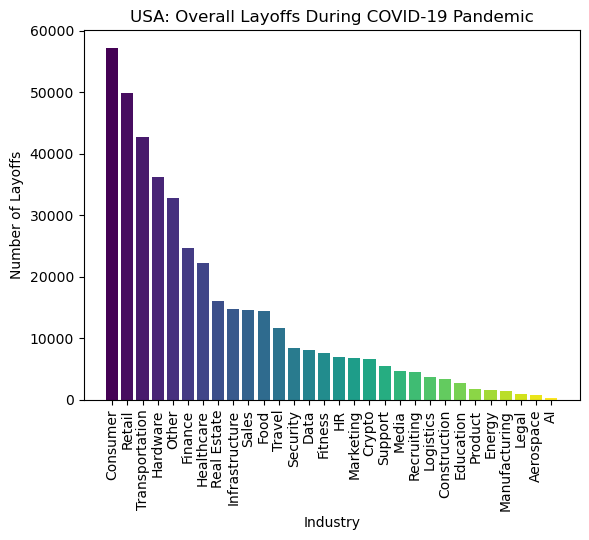

In [25]:

total_layoffs = pd.DataFrame(usa_lay_industry_highest["Total Layoffs"])
#industry_category = usa_lay_industry_highest["industry"]

#colors = plt.cm.tab10.colors
#fig, ax= plt.subplots()
#bars = ax.bar
#ax = total_layoffs.plot(kind="bar",color=colors,legend=False)

#plt.bar(total_layoffs,color=colors)

# Generate a colormap with enough colors 
colormap = plt.cm.viridis 

# Normalize color range 
norm = plt.Normalize(vmin=0, vmax=len(total_layoffs) - 1) 
# Create bar plot with automatic colors 
fig, ax = plt.subplots() 
bars = ax.bar(total_layoffs.index, total_layoffs["Total Layoffs"], color=colormap(norm(range(len(total_layoffs)))))

plt.xlabel('Industry')
plt.ylabel('Number of Layoffs')
plt.title('USA: Overall Layoffs During COVID-19 Pandemic')

plt.xticks(rotation=90)

plt.show()

In [26]:
total_layoffs.columns

Index(['Total Layoffs'], dtype='object')

In [27]:
total_layoffs.index.unique()
unique_industries = total_layoffs.index.unique()

In [28]:
industry_date = usa_lay_date_sumary.sort_values(by="Total Layoffs", ascending = False)
industry_date.head(10)

Total Layoffs  Average Layoffs  Median Layoffs
date    industry                                                      
2022-11 Consumer                15215          3043.00           400.0
2024-04 Transportation          14600          4866.67           500.0
2023-01 Consumer                12239          2039.83            53.0
        Other                   11372           947.67           107.5
        Retail                  11015          1223.89           150.0
2023-03 Consumer                10780          5390.00          5390.0
2023-01 Hardware                10343          2585.75          2600.0
2022-11 Retail                  10090          5045.00          5045.0
2023-03 Retail                   9391          1565.17           100.0
2023-02 Hardware                 9050          4525.00          4525.0

In [29]:
usa_lay_industry_highest_head = usa_lay_ind_summary.sort_values(by="Total Layoffs", ascending = False)
usa_lay_industry_highest_head.head(5)

,Total Layoffs,Average Layoffs,Median Layoffs
industry,,,
Consumer,57220,615.27,95.0
Retail,49887,509.05,100.0
Transportation,42675,479.49,120.0
Hardware,36210,1341.11,320.0
Other,32819,368.75,112.0


In [30]:
usa_lay_industry_tail = usa_lay_ind_summary.sort_values(by="Total Layoffs", ascending = False)
usa_lay_industry_tail.tail(5)

,Total Layoffs,Average Layoffs,Median Layoffs
industry,,,
Energy,1647,183.00,154.0
Manufacturing,1512,168.00,108.0
Legal,906,90.60,87.5
Aerospace,737,81.89,75.0
AI,242,60.50,40.0


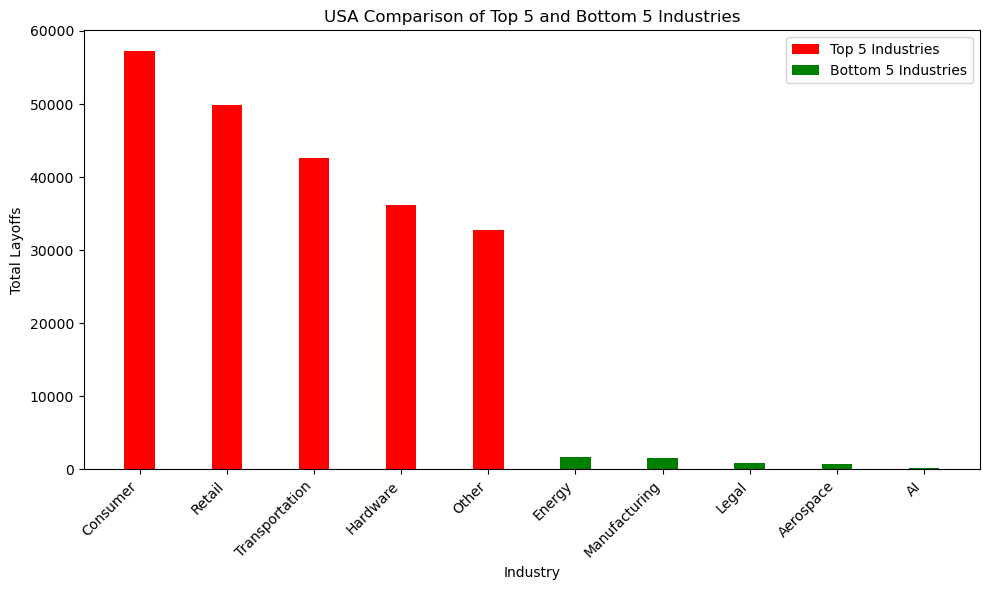

In [31]:


# Example data (replace with your actual data)
usa_lay_ind_summary = {
    'Industry': ['Consumer', 'Retail', 'Transportation', 'Hardware', 'Other', 'Energy', 'Manufacturing', 'Legal', 'Aerospace', 'AI'],
    'Total Layoffs': [57220, 49887, 42675, 36210, 32819, 1647, 1512, 906, 737, 242]
}

# Convert to DataFrame
usa_lay_ind_df = pd.DataFrame(usa_lay_ind_summary)

# Sort data to get top 5 and bottom 5 industries
usa_lay_industry_highest_head = usa_lay_ind_df.sort_values(by="Total Layoffs", ascending=False).head(5)
usa_lay_industry_tail = usa_lay_ind_df.sort_values(by="Total Layoffs", ascending=False).tail(5)

# Extracting data for plotting
highest_head_labels = usa_lay_industry_highest_head['Industry']
highest_head_values = usa_lay_industry_highest_head['Total Layoffs']

tail_labels = usa_lay_industry_tail['Industry']
tail_values = usa_lay_industry_tail['Total Layoffs']

# Combine all labels for x-axis
combined_labels = highest_head_labels.tolist() + tail_labels.tolist()

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(combined_labels))

bars1 = ax.bar(index[:5], highest_head_values, bar_width, label='Top 5 Industries', color='red')
bars2 = ax.bar(index[5:], tail_values, bar_width, label='Bottom 5 Industries', color='green')

ax.set_xlabel('Industry')
ax.set_ylabel('Total Layoffs')
ax.set_title('USA Comparison of Top 5 and Bottom 5 Industries')
ax.set_xticks(index)
ax.set_xticklabels(combined_labels, rotation=45, ha='right')

ax.legend()

plt.tight_layout()
plt.show()


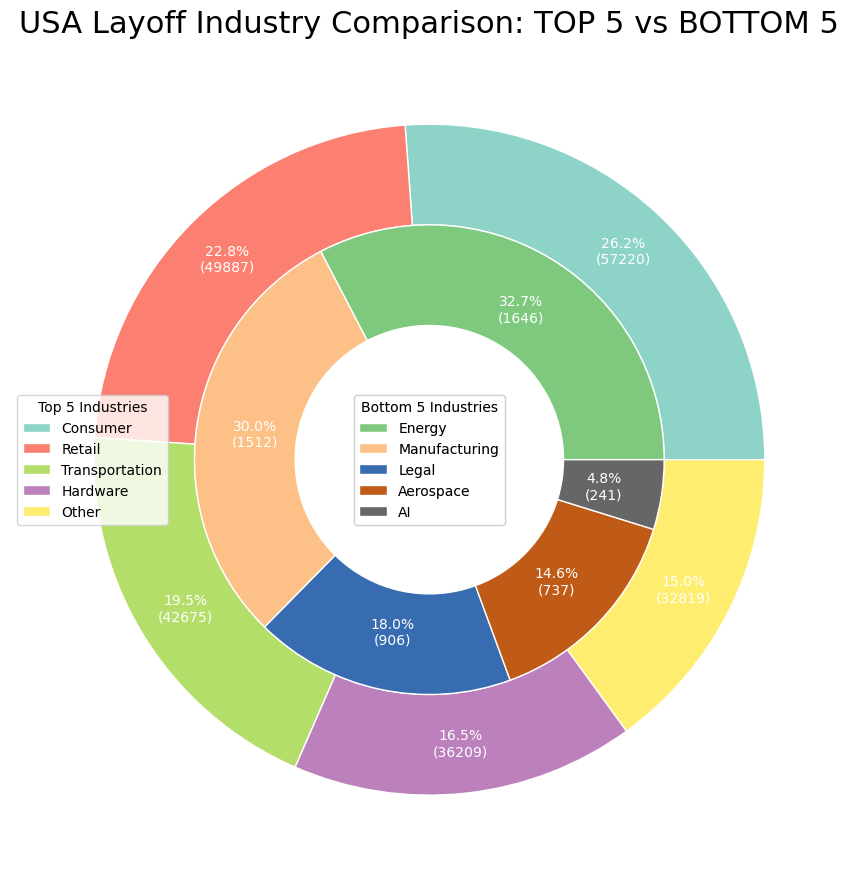

In [32]:

# data
usa_lay_industry_highest_head = {
    'Industry': ['Consumer', 'Retail', 'Transportation', 'Hardware', 'Other'],
    'Total Layoffs': [57220, 49887, 42675, 36210, 32819]
}

usa_lay_industry_tail = {
    'Industry': ['Energy', 'Manufacturing', 'Legal', 'Aerospace', 'AI'],
    'Total Layoffs': [1647, 1512, 906, 737, 242]
}

# Extracting data
highest_head_labels = usa_lay_industry_highest_head['Industry']
highest_head_values = usa_lay_industry_highest_head['Total Layoffs']

tail_labels = usa_lay_industry_tail['Industry']
tail_values = usa_lay_industry_tail['Total Layoffs']

# Creating the pie chart
fig, ax = plt.subplots(figsize=(13, 9))  # Adjust figsize as needed

# Pie chart parameters
size = 0.3

# Set custom colors for outer pie (highest head)
outer_colors = plt.cm.Set3(np.linspace(0, 1, len(highest_head_labels)))

# Set custom colors for inner pie (tail)
inner_colors = plt.cm.Accent(np.linspace(0, 1, len(tail_labels)))

# Outer pie (highest head)
wedges1, texts1, autotexts1 = ax.pie(highest_head_values, radius=1, colors=outer_colors,
                                     wedgeprops=dict(width=size, edgecolor='w'), autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*np.sum(highest_head_values))})',
                                     pctdistance=0.85, textprops=dict(color='w'))

# Inner pie (tail)
wedges2, texts2, autotexts2 = ax.pie(tail_values, radius=1-size, colors=inner_colors,
                                     wedgeprops=dict(width=size, edgecolor='w'), autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*np.sum(tail_values))})',
                                     pctdistance=0.75, textprops=dict(color='w'))

# Create legends with titles for each category
legend1 = ax.legend(wedges1, highest_head_labels, title="Top 5 Industries", loc='center left')
legend2 = ax.legend(wedges2, tail_labels, title="Bottom 5 Industries", loc='center')

# Adjust layout to accommodate both legends
ax.add_artist(legend1)
ax.add_artist(legend2)

# Set title and equal aspect ratio
ax.set_title('USA Layoff Industry Comparison: TOP 5 vs BOTTOM 5', fontsize=22)

ax.set(aspect="equal")

plt.tight_layout()  # Adjust spacing automatically

plt.show()
